University of Helsinki, Master's Programme in Data Science  
DATA20047 Probabilistic Cognitive Modelling - Spring 2023  
Luigi Acerbi  

# Week 3 workshop: Statistical modelling and the response distribution - Solutions

The goal of this workshop is to "predict behavior", that is compute the distribution of responses a Bayesian observer could give in a psychophysical experiment. In particular, we aim to develop all the tools so that we can reproduce the findings of the time perception experiment of \[**JS10**\].

## Reading material for this workshop

- Chapter 4 of \[**MKG22**\].
- Lecture notes (Week 3), found on Moodle.

## References

- \[**MKG22**\] Ma WJ, Körding K, and Goldreich D. "Bayesian Models of Perception and Action: An Introduction". MIT Press, 2022.
- \[**JS10**\] Jazayeri M and Shadlen MN. "Temporal context calibrates interval timing". *Nature Neuroscience*, 2010. [Link]( https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2916084/)
-------------------

### Exercise 3.1: Response distribution in the Gaussian case

> **Motivation:** The estimate distribution $p(\hat{s}|s)$ and, similarly, the response distribution $p(r|s)$ (which is just the estimate plus motor noise), are how we connect our cognitive models to the actual data measured in an experiment (the stimuli and subject's responses). Here we compute the response distribution in the common Gaussian case, for which everything can be computed analytically.

We consider now the *response distribution* for the basic model of perception (see the lecture notes and Section 4.2 of \[**MKG22**\]). Here, we assume that the observer is asked to judge the time interval $s$ between two flashes, measured in milliseconds (ms). In each trial, the duration is drawn from an interval distribution $p(s)$.

For this exercise, we assume:
- a Gaussian stimulus distribution and prior over time intervals, $p(s) = \mathcal{N}(s|\mu_s = 847, \sigma_s^2 = 100^2)$; 
- a Gaussian measurement distribution (and likelihood) $p(x|s) = \mathcal{N}\left(x| s, \sigma^2 \right)$, with $\sigma = 100$ ms; 
- the observer, upon observing noisy measurement $x_\text{obs}$, will respond with decision $\hat{s}_\text{PM}(x_\text{obs})$ which corresponds to the *posterior mean* (hence the "PM" subscript);
- for now, no motor/response noise, so the response is equal to the estimate, $r \equiv \hat{s}_\text{PM}$.

Remember that for a Gaussian measurement distribution, Gaussian posterior, and posterior mean estimate $\hat{s}_\text{PM}$ (which is a linear function of the measurement), the estimate distribution is also Gaussian.

- a) For $s = 1200$ ms, plot the estimate distribution $p(\hat{s}_\text{PM}|s)$ computed analytically using the formulas seen in this week's lecture (also Section 4.2 of \[**MKG22**\]). Plot on the same graph the measurement distribution $p(x|s)$ and the posterior $p(s_\text{hyp}|x_\text{obs})$ for $x_\text{obs} = 1200$ ms. What do you observe?
- b) Assume now that motor noise is added to the estimate (e.g., the subject is asked to reproduce the perceived time interval by holding the mouse button for the same duration). This yields the response distribution $p(r|\hat{s}) = \mathcal{N}\left(r|\hat{s}_\text{PM}, \sigma_\text{motor}^2 \right)$ with $\sigma_\text{motor} = 100$ ms. Compute $p(r|s)$ analytically and plot it.

*Hint*: Note that $p(r|\hat{s})$ is the distribution of the random variable $r$ equivalently defined as:
$$r = \hat{s} + \varepsilon_\text{motor} \qquad \text{with} \quad \varepsilon_\text{motor} \sim \mathcal{N}\left(\epsilon_\text{motor}; 0, \sigma_\text{motor}^2 \right)$$
where $\varepsilon_\text{motor}$ is the random motor noise term (the symbol $\sim$ means "is a random variable from the following distribution"). The equation above makes it easy to compute the distribution for $r$, by using the expression for the mean and variance of the sum of Gaussian random variables.

#### Exercise 3.1 Answers

- a) As seen in class,
$$
\hat{s} \sim \mathcal{N}\left(\hat{s}; \mu_\hat{s}, \sigma_\hat{s}^2 \right)
$$
where
$$
\mu_\hat{s} = ws + (1-w)\mu_s, \quad \sigma_\hat{s}^2 = w^2 \sigma^2, \quad w = \frac{\sigma_s^2}{\sigma_s^2 + \sigma^2}.
$$
  See code and plots below. We can see that all distributions are different, as we discussed in the lecture (see also Section 4.3 of \[**MKG22**\]). If you are not surprised by it, it's the correct reaction: these are all very distinct distributions.

a)


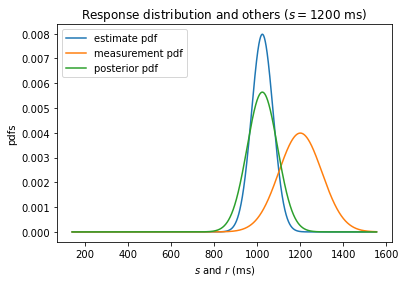

In [6]:
import numpy as np
import numpy.random as npr
import scipy.stats as sps
import matplotlib.pyplot as plt

# For convenience, we already provide a grid to plot the distributions
def compute_grid_1d_gaussian(mu_s, sigma_s, sigma, N=int(2**12+1)):
    """Compute a suitable 1-D grid, for a Gaussian prior and likelihood."""
    sigma_tot = np.sqrt(sigma_s**2 + sigma**2)
    lb = mu_s - 5*sigma_tot # lower bound
    ub = mu_s + 5*sigma_tot # upper bound
    s_grid = np.linspace(lb, ub, N)
    ds = s_grid[1] - s_grid[0] # grid spacing
    return s_grid, ds

mu_s = 847.
sigma_s = 100.
sigma = 100.
r_grid, dr = compute_grid_1d_gaussian(mu_s, sigma_s, sigma)

# We also provide a function to compute mean and std of the posterior
def gaussian_posterior(mu_s, sigma_s, sigma, x_obs):
    """Compute posterior mean and standard deviation given prior mean/std, measurement noise and observation."""
    mu_post = (mu_s*sigma**2 + x_obs*sigma_s**2) / (sigma**2 + sigma_s**2)
    sigma_post = sigma * sigma_s / np.sqrt(sigma**2 + sigma_s**2)
    return mu_post, sigma_post

##########################################################################
print('a)')

def gaussian_estimate_moments(s,mu_s,sigma_s,sigma):
    """Compute mean and variance of estimate distribution, for Gaussian prior and likelihood."""
    w = sigma_s**2 / (sigma_s**2 + sigma**2)
    mu_est = w*s + (1-w)*mu_s
    sigma_est = w*sigma
    # Equivalent formulation using Eqs. 4.3-5 from [MKG22]
    # mu_est = (s/sigma**2 + mu_s/sigma_s**2)/(1/sigma**2 + 1/sigma_s**2)
    # sigma_est = 1/sigma/(1/sigma**2 + 1/sigma_s**2)    
    return mu_est, sigma_est

# Compute estimate pdf p(s_hat|s) - this is equal to p(r|s) in the absence of motor noise
s = 1200.
mu_est, sigma_est = gaussian_estimate_moments(s,mu_s,sigma_s,sigma)
estimate_pdf = sps.norm.pdf(r_grid, mu_est, sigma_est)

# Compute measurement pdf - simply p(x|s)
measurement_pdf = sps.norm.pdf(r_grid,s,sigma)

# Compute posterior pdf p(s|x_obs)
x_obs = 1200.
mu_post, sigma_post = gaussian_posterior(mu_s, sigma_s, sigma, x_obs)
posterior_pdf = sps.norm.pdf(r_grid,mu_post,sigma_post)

# Plot everything
plt.plot(r_grid, estimate_pdf, label='estimate pdf')
plt.plot(r_grid, measurement_pdf, label='measurement pdf')
plt.plot(r_grid, posterior_pdf, label='posterior pdf')
plt.xlabel(r'$s$ and $r$ (ms)')
plt.ylabel(r'pdfs')
plt.title(r'Response distribution and others ($s = ' + str(int(s)) + r'$ ms)')
plt.legend()
plt.show()

- b) **Adding motor noise to the response:** since 
$$r = \hat{s} + \varepsilon_\text{motor}, \qquad \text{with} \quad \varepsilon_\text{motor} \sim \mathcal{N}\left(\epsilon_\text{motor}; 0, \sigma_\text{motor}^2 \right) $$ 
where $\hat{s}$ is Gaussian, we have
$$
r \sim \mathcal{N}\left(r; \mu_{\hat{s}}, \sigma_{\hat{s}}^2 + \sigma_\text{motor}^2 \right)
$$
where $\mu_{\hat{s}}$ and $\sigma_{\hat{s}}^2$ were computed in the previous answer.
See code and plot below. As expected, the response distribution with noise is a smoothed version of the noiseless one.

b)


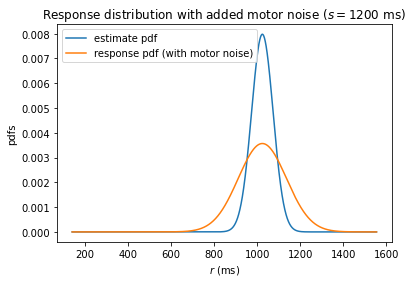

In [2]:
print('b)')

sigma_motor = 100.

# Analytical computation
mu_resp_withnoise = mu_est # Response mean is sum of the means (the added motor noise has zero mean)
sigma_resp_withnoise = np.sqrt(sigma_est**2 + sigma_motor**2) # Response variance is sum of the variances
response_pdf_withnoise = sps.norm.pdf(r_grid, mu_resp_withnoise, sigma_resp_withnoise)

plt.plot(r_grid, estimate_pdf, label='estimate pdf')
plt.plot(r_grid, response_pdf_withnoise, label='response pdf (with motor noise)')
plt.xlabel(r'$r$ (ms)')
plt.ylabel(r'pdfs')
plt.title(r'Response distribution with added motor noise ($s = ' + str(int(s)) + r'$ ms)')
plt.legend()
plt.show()

### Exercise 3.2: Numerical computation of the response distribution

> **Motivation:** While analytical computations are great, in more complex scenarios we will have to compute response distributions $p(r|s)$ for which there is no analytical solution. In this exercise, we learn how to do so building on top of the numerical integration exercises we did the previous weeks.

We recall that the response distribution $p(r|s)$ can be computed as (see lecture notes):
$$
p(r|s) = \int p\left(r| \hat{s}(x)\right) p\left(x|s\right) d x.
$$
We consider below two alternative numerical approaches to compute this integral for the response distribution: a **simulation (or sampling, or Monte Carlo)** approach and a **numerical integration** approach.

We use the same setup as in Exercise 3.1b:
- Gaussian stimulus distribution and prior $p(s) = \mathcal{N}(s| \mu_s = 847, \sigma_s^2 = 100^2)$; 
- Gaussian measurement distribution (and likelihood) $p(x|s) = \mathcal{N}\left(x| s, \sigma^2 \right)$, with $\sigma = 100$ ms; - the observer responds with the posterior mean $\hat{s}_\text{PM}(x_\text{obs})$; 
- Gaussian motor response noise $p(r|\hat{s})$, with $\sigma_\text{motor} = 100$ ms.

#### a) Simulation (or sampling, or Monte Carlo):

Compute $p(r|s)$ for $s = 1200$ ms by simulation (also known as *sampling* or "Monte Carlo" method):
  - First, sample $x \sim p(x|s)$. Take $N = 10^5$ samples.
  - Then, compute $\hat{s} = \hat{s}(x)$ for all samples.
  - Finally, sample $r \sim p(r|\hat{s})$ for all samples.
  - Plot an histogram of the responses together with the analytical distribution computed in Exercise 3.1b and check that the two match. *Hint*: Use `matplotlib.pyplot.hist` with `density=True`.
  
#### b) Numerical integration:

Compute $p(r|s)$ for $s = 1200$ ms directly from the expression at the beginning of the exercise, via numerical integration.
  - Prepare a 2-D row vector `x_row` of $x$ grid values and a 2-D column vector `r_col` of $r$ grid values. Use $N_x = 2^9 + 1$ and $N_r = 2^9 + 1$ points for each grid. *Hint*: Use `numpy.linspace` to create the grids as 1D Numpy arrays and `numpy.reshape` to transform them to row and column vectors in 2D. Note that Numpy treats differently 1-D arrays (for which there is no distinction between row and column) and N-D arrays; now we want to work with the latter. Print `x_row.shape` and `r_col.shape` to check that the vectors have the right dimensions (it should be `(1, 513)` and `(513, 1)`, respectively).
  - Compute $\hat{s}(x)$, which should be a row vector as well, since $x$ is a row vector (double-check it!).
  - Evaluate the integrand $p\left(r| \hat{s}(x)\right) p\left(x|s\right)$. Since $\hat{s}$ is a row vector while $r$ is a column vector, if you did things correctly the elementwise product will produce a full 2D matrix with shape `(513, 513)` due to *broadcasting* (double-check!). If it is not clear what's going on, read here: https://numpy.org/doc/stable/user/basics.broadcasting.html
  - Compute the integral over $x$ by integrating away the second dimension (rows). The resulting vector is $p(r|s)$. *Hint*: For functions in `scipy.integrate` you can indicate the `axis` you want to integrate over; here you will want `axis=1`. Note that integrating over rows of a 2D array will produce a 1D Numpy array with shape `(513,)` as opposed to a single-column 2D array `(513,1)` (this is not a problem for now, but keep it in mind for the future, as it can be a source of mistakes later on). 
  - To validate your calculations, plot $p(r|s)$ computed via numerical integration together with the analytical distribution computed in Exercise 3.1b. Check that they match.
  - As a sanity check, it is also good to verify via numerical integration that $\int p(r|s) dr = 1$ at the end of all these computations. Tiny numerical differences are expected, but larger deviations mean that something went wrong along the way.

*Notes*: 
- For these computations to be fast, it is important to use `numpy` arrays and vectorized code (i.e., no loops). This doesn't make a big difference now but it will matter in the future, when we start fitting models to data.
- Numerical integration, when feasible, is *orders of magnitude* faster and more precise than approximate distributions obtained via sampling, so numerical integration should be preferred over simulation whenever possible. Numerical integration, however, is infeasible if the measurement $x$ is not very low-dimensional (up to ~3-4 dimensions). In our course we will almost always be in the low-dimensional case so you should use numerical integration unless stated otherwise.
- Obviously, analytical methods should be preferred over numerical methods whenever possible. In this exercise, we use numerical methods for a problem that is solvable analytically so that we can compare the solutions to the analytical ground truth.
- In addition to what said above, simulation still has a role in that it can be useful to double-check your results, as typically writing the code for simulation is easier than coding numerical integrals or deriving analytical solutions.

#### Exercise 3.2 Answers

- a) **Simulation**: See code and plot below. Simulated and analytical distributions match very well.

a)


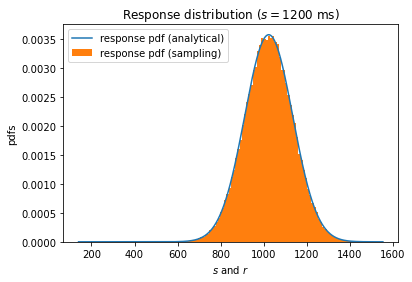

In [3]:
import numpy as np
import numpy.random as npr
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

mu_s = 847.
sigma_s = 100.
sigma = 100.
sigma_motor = 100.
s = 1200.

print('a)')

Ns = int(1e5)
x_samples = npr.normal(loc=s, scale=sigma, size=Ns)
s_hat, _ = gaussian_posterior(mu_s, sigma_s, sigma, x_obs=x_samples) # The first output is the posterior mean
r = npr.normal(loc=s_hat, scale=sigma_motor, size=Ns) # Add motor noise

plt.plot(r_grid, response_pdf_withnoise, label='response pdf (analytical)')
plt.hist(r, bins=100, density=True, label='response pdf (sampling)')
plt.xlabel(r'$s$ and $r$')
plt.ylabel(r'pdfs')
plt.title(r'Response distribution ($s = ' + str(int(s)) + r'$ ms)')
plt.legend()
plt.show()

- b) **Numerical integration:** See below. Numerically-integrated and analytical distributions match perfectly, and $\int p(r|s) dr = 1$ up to numerical error.

b)
x_row.shape: (1, 513)
r_col.shape: (513, 1)
s_hat_row.shape: (1, 513)
integrand.shape: (513, 513)
response_integral_pdf.shape: (513,)


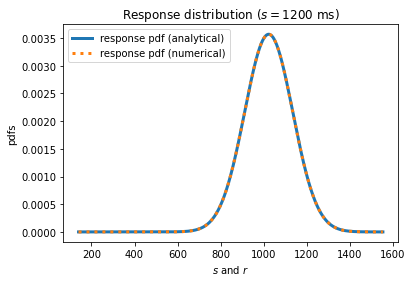

Normalization constant of response pdf: 0.9997997783232789


In [4]:
print('b)')

Nx = 2**9+1
Nr = 2**9+1

x_row, dx = compute_grid_1d_gaussian(mu_s, sigma_s, sigma, Nx)
x_row = x_row.reshape((1,Nx)) # make x a row vector
r_col, dr = compute_grid_1d_gaussian(mu_s, sigma_s, sigma, Nr)
r_col = r_col.reshape((Nr,1)) # make r a column vector

print('x_row.shape: {}'.format(x_row.shape))
print('r_col.shape: {}'.format(r_col.shape))

s_hat_row, _ = gaussian_posterior(mu_s, sigma_s, sigma, x_obs=x_row)
print('s_hat_row.shape: {}'.format(s_hat_row.shape))

# Compute the integral
integrand = sps.norm.pdf(r_col,s_hat_row,sigma_motor) * sps.norm.pdf(x_row,s,sigma)
print('integrand.shape: {}'.format(integrand.shape))
response_integral_pdf = sp.integrate.romb(integrand, dx=dx, axis=1)
#response_integral_pdf = np.sum(integrand,1)*dx   # This would also work!
print('response_integral_pdf.shape: {}'.format(response_integral_pdf.shape))

plt.plot(r_grid, response_pdf_withnoise, linewidth=3, label='response pdf (analytical)')
plt.plot(r_col.flatten(), response_integral_pdf, ':', linewidth=3, label='response pdf (numerical)')
plt.xlabel(r'$s$ and $r$')
plt.ylabel(r'pdfs')
plt.title(r'Response distribution ($s = ' + str(int(s)) + r'$ ms)')
plt.legend()
plt.show()

# Sanity check
print('Normalization constant of response pdf: {}'.format(sp.integrate.romb(response_integral_pdf, dx=dr)))

### Exercise 3.3: Bias, variance and mean squared error

> **Motivation:** Why being Bayesian at all? We show here how being Bayesian increases bias but reduces variance, overall reducing the average error.

We consider here the bias, variance and mean squared error (see Section 3.2 in the lecture notes, and Section 4.5 in \[**MKG22**\]).

In this exercise, we consider a bounded uniform stimulus distribution (and prior) for time intervals expressed in ms, $\text{Uniform}(s; 671, 1023)$ (see Exercise 2.4), and a Gaussian measurement distribution (and likelihood) $p(x|s) = \mathcal{N}(x; s, \sigma^2)$ with $\sigma = 60$ ms.

- a) Plot bias, standard deviation and conditional RMSE for the posterior mean estimator $\hat{s}_\text{PM}$, as a function of $s$. Compute the overall RMSE for $\hat{s}_\text{PM}$.
- b) Plot bias, standard deviation and conditional RMSE for the maximum-likelihood estimator $\hat{s}_\text{ML}$ defined as $\hat{s}_\text{ML}(x) = x$, as a function of $s$. Compute the overall RMSE for $\hat{s}_\text{ML}$.
- c) Discuss your findings, comparing the two estimators $\hat{s}_\text{PM}$ and $\hat{s}_\text{ML}$.

*Hints*:
- To evaluate the expectations, you will need to compute the integrals numerically. Use the techniques developed in Exercise 3.2 (in particular, numerical integration is recommended).
- When plotting the bias and other metrics as a function of $s$, restrict yourself to the support of the stimulus distribution (in this case, $671 \le s \le 1023$ ms). However, you will need a larger grid when computing the location of the noisy measurement $x$!

#### Exercise 3.3 Answers

- a) See below.
- b) See below.
- c) For the posterior mean estimator $\hat{s}_\text{PM}$, we can see that the response is (nonlinearly) biased towards the center of the prior (positive bias for small $s$ and negative bias for larger $s$). Instead, the maximum-likelihood estimator $\hat{s}_\text{ML}$ in unbiased. However, the maximum-likelihood estimator has constant unit standard deviation, whereas the posterior-mean estimator has a much lower variability. Overall, the posterior mean estimator has a lower RMSE than the maximum-likelihood estimator.

a)
okokok : [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


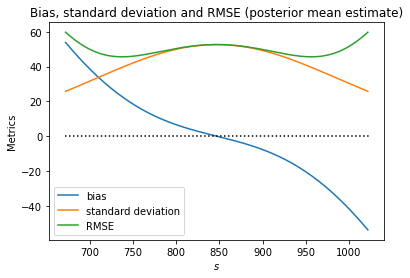

Total RMSE (posterior mean estimate): 49.75773321813645


In [9]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

a = 671.
b = 1023.
sigma = 60.

print('a)')
Nx = 2**9+1
Ns = 2**9+1

# define the grid
lb = a - sigma*5.
ub = b + sigma*5.
x_row = np.linspace(lb, ub, Nx).reshape((1,Nx)) # make x a row vector
s_col = np.linspace(lb, ub, Ns).reshape((Ns,1)) # make s a column vector
dx = x_row.flatten()[1] - x_row.flatten()[0]
ds = s_col.flatten()[1] - s_col.flatten()[0]

def compute_posterior_mean_1d(s_grid, prior_pdf, likelihood):
    """Compute s_hat_PM (posterior mean) for an arbitrary prior and likelihood in 1d."""
    ds = s_grid.flatten()[1] - s_grid.flatten()[0] # grid spacing
    protoposterior = prior_pdf * likelihood    
    normalization_constant = sp.integrate.romb(protoposterior, dx=ds, axis=0)
    posterior_pdf = protoposterior / normalization_constant
    posterior_mean = sp.integrate.romb(s_grid * posterior_pdf, dx=ds, axis=0)
    return posterior_mean

# First compute s_hat(x) for all values of x on the grid
prior_pdf = sps.uniform.pdf(s_col, a, b-a)
likelihood = sps.norm.pdf(x_row, s_col, sigma) 
s_hat_row = compute_posterior_mean_1d(s_col, prior_pdf, likelihood).reshape((1,Nx)) # keep as a row vector

def compute_and_plot_metrics(s_col, s_hat, stimulus_pdf, label):
    """Compute bias, variance, conditional and overall MSE."""
    bias = sp.integrate.romb(s_hat * sps.norm.pdf(x_row,s_col,sigma),dx=dx,axis=1) - s_col.flatten()
    std = np.sqrt(sp.integrate.romb(s_hat**2 * sps.norm.pdf(x_row,s_col,sigma),dx=dx,axis=1) 
        - sp.integrate.romb(s_hat * sps.norm.pdf(x_row,s_col,sigma),dx=dx,axis=1)**2)
    rmse = np.sqrt(bias**2 + std**2)
    
    # Plot only where the support of the Uniform stimulus distribution is nonzero
    s_range = s_col.copy()
    s_range[np.logical_or(s_range < a, s_range > b)] = np.nan

    plt.plot(s_range.flatten(),bias.flatten(),label='bias')
    plt.plot(s_range.flatten(),std.flatten(),label='standard deviation')
    plt.plot(s_range.flatten(),rmse.flatten(),label='RMSE')
    plt.plot((a,b),(0,0),':k')
    plt.xlabel(r'$s$')
    plt.ylabel(r'Metrics')
    plt.title('Bias, standard deviation and RMSE (' + label + ')')
    plt.legend()
    plt.show()

    total_rmse = np.sqrt(sp.integrate.romb(rmse**2 * stimulus_pdf,dx=ds))
    print('Total RMSE (' + label + '): {}'.format(total_rmse))

stimulus_pdf = prior_pdf.copy().flatten()# As in most cases we consider, these two pdfs are the same
compute_and_plot_metrics(s_col, s_hat_row, stimulus_pdf, 'posterior mean estimate')    

### Exercise 3.4: Bayesian inference in duration estimation

> **Motivation:** We have now all the tools to predict the findings of a famous time perception experiment \[**JS10**\].

In each trial of the experiment, an observer is asked to judge the time interval $s$ between two flashes, measured in milliseconds (ms). Consider the following setup:

- In each trial, the interval duration $s$ is drawn from an interval distribution $p(s)$.
- The experiment consist of three separate blocks of sessions run over multiple days. Each experimental block is identical except for the distribution of intervals $p(s)$. The distribution of time intervals in the three blocks are: 
  - $p_\text{short}(s) = \text{Uniform}\left(s; 494, 847\right)$
  - $p_\text{medium}(s) = \text{Uniform}\left(s; 671, 1023\right)$
  - $p_\text{long}(s) = \text{Uniform}\left(s; 847,1200\right)$
- The observer's measurement distribution follows *Weber's law* (known in time perception as the "scalar property" of temporal judgment). According to this empirical law, the measurement noise is roughly linearly proportional to the magnitude of the stimulus. In formulas, $$p(x|s) = \mathcal{N}\left(x|s,\sigma^2(s)\right) \qquad \text{with} \quad \sigma(s) = w_s \cdot s$$
  where $w_s$ is known as *Weber's fraction*. Typical values of $w_s$ in timing are around 0.05-0.2, here we assume $w_s = 0.1$.
- It is assumed that, after some practice, the observer develops a prior $p(s)$ which matches the stimulus distribution used in that block of sessions (and that the likelihood also matches the measurement distribution).
- The observer responds with a deterministic estimate $\hat{s}$ (see below). (The "response" is not verbal; for example in \[**JS10**\] the observers is asked to match the estimated duration with a mouse click.)
- For the purpose of this exercise, we ignore motor noise (which would simply add some extra variability to the data).

----------------------------

- a) Plot the expected response $\mathbb{E}\left[\hat{s}|s\right]$ for an observer using the posterior-mean  estimator $\hat{s}_\text{ML}$, in the three different blocks. Make the plots in the same graph.
- b) Plot the expected response $\mathbb{E}\left[\hat{s}|s\right]$ for an observer using the maximum-likelihood  estimator $\hat{s}_\text{PM}$, in the three different blocks. Make the plots in the same graph.
- c) Discuss your results.
- d) Compare your predictions with the empirical data in Figure 2 of \[**JS10**\].

#### Exercise 3.4 Answers

- a) See below.
- b) See below.
- c) The graph posterior mean estimate shows three main effects:
  - In each block, the responses are biased towards the mean interval duration for that block ("regression to the mean").
  - The slope of the bias depends on the block, with the "long" block showing the strongest bias, and the "short" block the weakest.
  - The effect is *contextual*: given the same stimulus $s$, the way the response is biased depends on the block (e.g., look at 847 ms).
  -  None of these effects are present for the maximum-likelihood estimate.
- d) The plot for the posterior mean estimator matches Figure 2 of \[**JS10**\] quite well qualitatively. At first glance, the experimental data are remarkably consistent with the behavior expected from a Bayesian observer. (The paper then performs a more quantitative analysis.)

a)


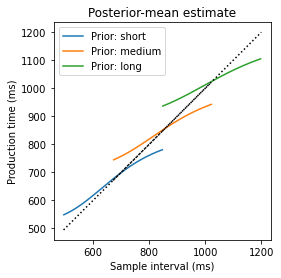


b)


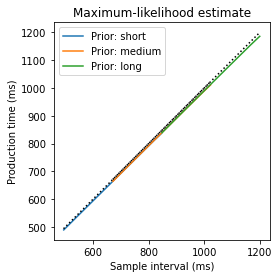

In [3]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import matplotlib.pyplot as plt

a = np.array((494, 671, 847))
b = np.array((847,1023,1200))
label = ('short','medium','long')
w_s = 0.1

Nx = 2**9+1
Ns = 2**9+1

print('a)')

for iter in range(a.size):    
    # define the grid
    lb = a[iter] - (w_s*a[iter])*5.
    ub = b[iter] + (w_s*b[iter])*5.
    x_row = np.linspace(lb, ub, Nx).reshape((1,Nx)) # make x a row vector
    s_col = np.linspace(lb, ub, Ns).reshape((Ns,1)) # make s a column vector
    dx = x_row.flatten()[1] - x_row.flatten()[0]
    
    # Compute s_hat (posterior mean) for each x
    prior_pdf = sps.uniform.pdf(s_col, a[iter], b[iter]-a[iter])
    likelihood = sps.norm.pdf(x_row, s_col, w_s*s_col)
    s_hat_row = compute_posterior_mean_1d(s_col, prior_pdf, likelihood).reshape((1,Nx)) # keep as a row vector
    
    # Compute expected s_hat for a given stimulus (integrate over measurements)
    mean_s_hat = sp.integrate.romb(s_hat_row * likelihood, dx=dx, axis=1) # note that here we integrate over x

    # Plot inside the range
    s_range = s_col.copy()
    s_range[np.logical_or(s_range < a[iter], s_range > b[iter])] = np.nan
    plt.plot(s_range.flatten(),mean_s_hat.flatten(),label='Prior: ' + label[iter])
    plt.plot((a[iter],b[iter]),(a[iter],b[iter]),':k')

plt.xlabel(r'Sample interval (ms)')
plt.ylabel(r'Production time (ms)')
plt.title('Posterior-mean estimate')
ax = plt.gca()
ax.set_aspect('equal')
plt.legend()
plt.show()

####################################################

print()
print('b)')

for iter in range(a.size):
    # define the grid    
    lb = a[iter] - (w_s*a[iter])*3.
    ub = b[iter] + (w_s*b[iter])*3.
    x_row = np.linspace(lb, ub, Nx).reshape((1,Nx)) # make x a row vector
    s_col = np.linspace(lb, ub, Ns).reshape((Ns,1)) # make s a column vector
    dx = x_row.flatten()[1] - x_row.flatten()[0]
    
    def compute_maximum_likelihood_1d(s_grid, prior_pdf, likelihood):
        mle = s_grid[np.argmax(likelihood, axis=0)]        
        return mle
    
    # Compute s_hat (maximum-likelihood estimate) for each x
    prior_pdf = sps.uniform.pdf(s_col, a[iter], b[iter]-a[iter])
    likelihood = sps.norm.pdf(x_row, s_col, w_s*s_col)
    s_hat_row = compute_maximum_likelihood_1d(s_col, prior_pdf, likelihood).reshape((1,Nx)) # keep as a row vector
    
    # Compute expected s_hat for a given stimulus (integrate over measurements)
    mean_s_hat = sp.integrate.romb(s_hat_row * likelihood, dx=dx, axis=1) # note that here we integrate over x

    # Plot inside the range
    s_range = s_col.copy()
    s_range[np.logical_or(s_range < a[iter], s_range > b[iter])] = np.nan
    plt.plot(s_range.flatten(),mean_s_hat.flatten(),label='Prior: ' + label[iter])
    plt.plot((a[iter],b[iter]),(a[iter],b[iter]),':k')
    
plt.xlabel(r'Sample interval (ms)')
plt.ylabel(r'Production time (ms)')
plt.title('Maximum-likelihood estimate')
ax = plt.gca()
ax.set_aspect('equal')
plt.legend()
plt.show()
    

In [7]:
s_hat_row.shape

(1, 513)

In [8]:
likelihood.shape

(513, 513)